## Statistical Testing

You are working for a TexMex restaurant that recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

In [1]:
# run this cell without changes

import numpy as np
import pandas as pd 
from scipy import stats

import matplotlib.pyplot as plt

import pickle

%matplotlib inline

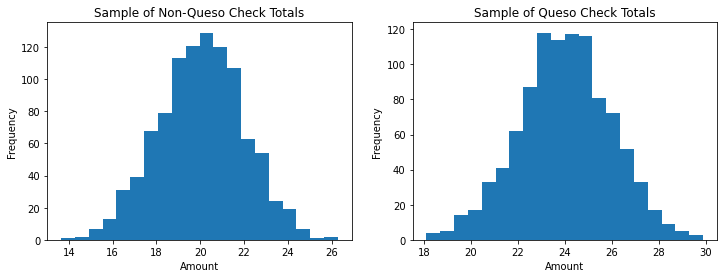

In [2]:
# run this cell without changes

# load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### 1. Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **significantly more *or* significantly less** than customers who do not order queso.

#### 1a) Describe the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

=== BEGIN MARK SCHEME ===

Null hypothesis: Customers who order queso spend the same as those who do not order queso. 

Alternative hypothesis: Customers who order queso do not spend the same as those who do not order queso. 

=== END MARK SCHEME ===

#### 1b) What does it mean to make `Type I` and `Type II` errors in this specific context?

=== BEGIN MARK SCHEME ===

Type I: (Rejecting the null hypothesis given it's true): Saying queso customers' total check amounts are different than non-queso customers' total check amounts when they are the same.

Type II: (Failing to reject the null hypothesis given it's false): Saying queso customers' total check amounts are the same as non-queso customers' total check amounts when they are different.

Give partial credit to students who describe what type I and type II errors are, but don't connect it to the specific context

=== END MARK SCHEME ===

### 2. Sample Testing

#### 2a) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. 

_Hint: Use `scipy.stats`, imported as `stats` above. [Documentation here](https://docs.scipy.org/doc/scipy/reference/stats.html)_

In [3]:
### BEGIN SOLUTION

"""
Because we are not specifying the specific way students must solve
this, this needs to be manually graded rather than autograded
"""

"""
One approach is to run a two-tailed t-test.  This will show a p-value
much smaller than 0.05.  This is more of a "black-box" approach where
SciPy does all of the math for you
"""
print("t-test approach")
ttest_result = stats.ttest_ind(no_queso, queso, equal_var=True)
p_value = ttest_result.pvalue
print(ttest_result)
print()

"""
Another approach is to compute the t-statistics for the rejection
region, and compare that to the test t-statistic.  The t-statistic
is much smaller than the lower bound of the critical region
"""

# sample sizes
n1 = len(no_queso)
n2 = len(queso)

# degrees of freedom
df = n1 + n2 - 2.0

print("Critical Region Approach")
critical_t = (stats.t.ppf(0.025, df=df), stats.t.ppf(0.975, df=df))
print("Critical region:", critical_t)

# sample means
xbar1 = no_queso.mean()
xbar2 = queso.mean()

# sample variances
v1 = np.var(no_queso, ddof=1)
v2 = np.var(queso, ddof=1)

# pooled standard deviation
svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df

# t-statistic
t = (xbar1 - xbar2)/(svar/n1 + svar/n2)**0.5

print("t:", t)
### END SOLUTION

t-test approach
Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

Critical Region Approach
Critical region: (-1.961152014836706, 1.9611520148367056)
t: -45.16857748646329


#### 2b) Can you reject the null hypothesis at a significance level of $\alpha = 0.05$?  Assign your answer to the variable `reject`

You can either write a mathematical expression, or just replace `None` with `True` or `False`

In [4]:
# replace None with appropriate code
reject = None
### BEGIN SOLUTION

reject = (p_value < 0.05)

### END SOLUTION

In [5]:
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

# reject should be a boolean value
assert type(reject) == bool or type(reject) == np.bool_

### BEGIN HIDDEN TESTS

assert reject == True

### END HIDDEN TESTS

#### Why or why not? Explain your answer

=== BEGIN MARK SCHEME ===

We have enough evidence to reject the null hypothesis at a significance level of alpha = 0.05. We obtain a p-value
much smaller than 0.025 (two-tailed test).

Alternatively:
our t-statistic is smaller than the critical t-statistic.

Both answers (p-value or critical t-statistic) are valid.

=== END MARK SCHEME ===